### Topics to Discuss:
>What is linear regression?<br>
>Analyzing Advertisement dataset.<br>
>Building a simple linear regression model & multiple linear regression model.<br>
>Understanding OLS methods to estimate model parameters.<br>
>How to use statsmodel API in python?<br>
>Interpreting the coefficients of the model.<br>
>How to find if the parameters estimated are significant?<br>
>Making predictions using the model.<br>
>Finding model residuals and analyzing it.<br>
>Evaluating model efficiency using RMSE and R-Square values.<br>
>Understanding gradient descent approach to find model parameters.<br>
>Splitting dataseta and cross validating models.<br>

In [1]:
import pandas as pd
import numpy as np

### Adverstiment Dataset
>The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles 
>like radio, tv and newspaper.

### Attribution Descriptions
>TV - Spend on TV Advertisements <br>
>Radio - Spend on radio Advertisements <br>
>Newspaper - Spend on newspaper Advertisements <br>
>Sales - Sales revenue generated <br>
Note: The amounts are in diffrent units

In [7]:
# load the data set
advt = pd.read_csv( "Advertising.csv" )



In [9]:
# EDA - Exploratory Data Analysis | Data Audit

advt.shape
advt.columns
advt.head(5)
#advt.info()
advt.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [2]:
# How to use any package
# 1) INSTALL - one time
# 2) Import - session specific

#_____________________________________________
#! pip install pandas-profiling

# to use any package: we have to INTALL that package* - 
   # to downlaod the required folder from internet to your system
#_____________________________________________
    
    
import sys
!{sys.executable} -m pip install pandas-profiling

     |████████████████████████████████| 240 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 594 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 75 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 295 kB 4.8 MB/s eta 0:00:01


  Created wheel for phik: filename=phik-0.11.0-py3-none-any.whl size=599735 sha256=ffaefb6c92ae75ce732300910fb09a52ee75da5d5a9f19dfb5be5091b09257af
  Stored in directory: /Users/akshatrastogi/Library/Caches/pip/wheels/15/cd/d8/d1a2da5bf20e6411649edb390d93887820168898a3659fd48d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=1ea9f173d41f2870ce5fb4401cadcb0aa5523ff9ddc9b4efcf2b5817aa2a9641
  Stored in directory: /Users/akshatrastogi/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0


In [4]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(advt)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
advt.head(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [11]:
#Remove the first column | I can do it with any method whatever I am 1) accustomed 2) knowledge

advt = advt[["TV", "Radio", "Newspaper", "Sales"]]

In [12]:
advt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
# Creating Data audit Report
# Use a general function that returns multiple values

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])




In [16]:
advt.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
TV,200.0,0.0,29408.5,147.0425,149.75,85.854236,7370.949893,0.7,5.387,13.195,24.88,74.375,149.75,218.825,261.44,280.735,292.907,296.4
Radio,200.0,0.0,4652.8,23.2640,22.90,14.846809,220.427743,0.0,0.399,1.995,3.40,9.975,22.90,36.525,43.52,46.810,49.400,49.6
Newspaper,200.0,0.0,6110.8,30.5540,25.75,21.778621,474.308326,0.3,0.999,3.600,5.99,12.750,25.75,45.100,59.07,71.825,89.515,114.0
Sales,200.0,0.0,2804.5,14.0225,12.90,5.217457,27.221853,1.6,4.784,6.600,7.96,10.375,12.90,17.400,21.71,23.800,25.507,27.0


In [20]:
#var_summary(advt.TV)
var_summary(advt.Newspaper)

N          200.000000
NMISS        0.000000
SUM       6075.728000
MEAN        30.378640
MEDIAN      25.750000
STD         21.192412
VAR        449.118306
MIN          0.999000
P1           0.999990
P5           3.600000
P10          5.990000
P25         12.750000
P50         25.750000
P75         45.100000
P90         59.070000
P95         71.825000
P99         89.401150
MAX         89.515000
dtype: float64

In [17]:
# Handling Outliers | I am capping that with Var > P99 then Var = P99 [Upper CAP]
#                                         Var < P01 then Var = P01 [Lower CAP]
#_________________________________________________________________________________
advt['Sales']= advt['Sales'].clip_upper(advt['Sales'].quantile(0.99)) 
advt['Sales']= advt['Sales'].clip_lower(advt['Sales'].quantile(0.01)) 

advt['Newspaper']= advt['Newspaper'].clip_upper(advt['Newspaper'].quantile(0.99)) 
advt['Newspaper']= advt['Newspaper'].clip_lower(advt['Newspaper'].quantile(0.01))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [10]:
#Handling Missings
# Fill with mean
# advt['Sales']=advt['Sales'].fillna(advt['Sales'].mean())

In [ ]:
#Dummy variable creation
#print df_G.join(pd.get_dummies(advt['key'], prefix='dummy')).drop('key', axis=1).drop('dummy_c', axis=1)

In [22]:
# exploring data
# Distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


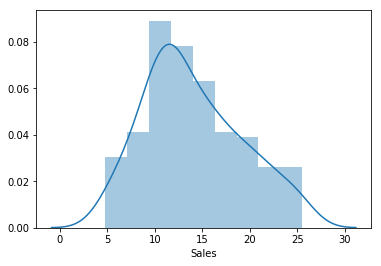

In [23]:
sns.distplot( advt.Sales ) # To check the normality if Y[Sales]

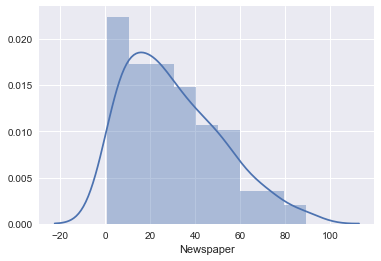

In [13]:
sns.distplot( advt.Newspaper )

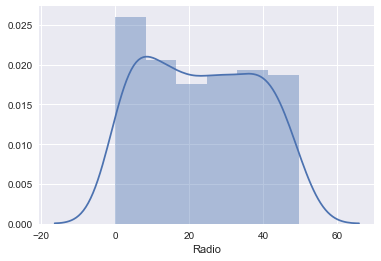

In [14]:
sns.distplot( advt.Radio )

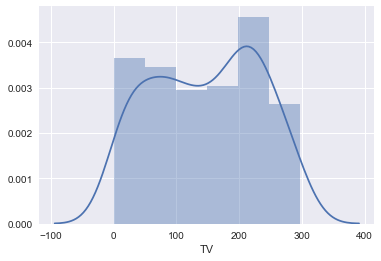

In [15]:
sns.distplot( advt.TV )

### Notes:
>Sales seems to be normal distribution. Spending on newspaper advertisement seems to be righ skewed.
Most of the spends on newspaper is fairly low where are spend on radio and tv seems be uniform distribution. 
Spends on tv are comparatively higher then spens on radio and newspaper.

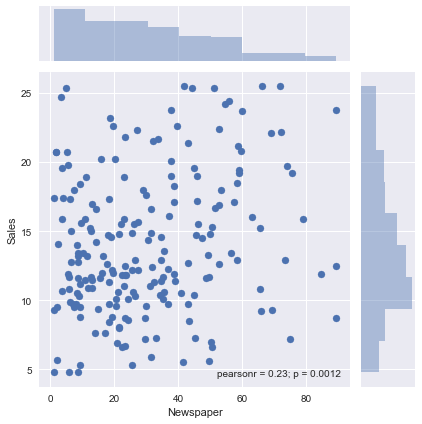

In [16]:
#Is there a relationship between sales and spend various advertising channels?

#Sales Vs. Newspaper advertisement spends

sns.jointplot(  advt.Newspaper, advt.Sales )

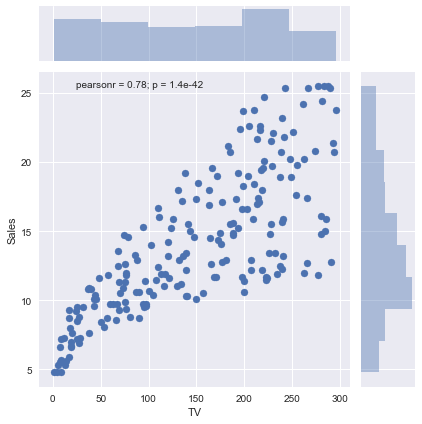

In [17]:
#Sales Vs. TV advertisement spends
sns.jointplot(  advt.TV, advt.Sales )

# Notes
>Sales and spend on newpaper is not highly correlaed where are sales and spend on tv is highly correlated.

In [ ]:
sns.pairplot?

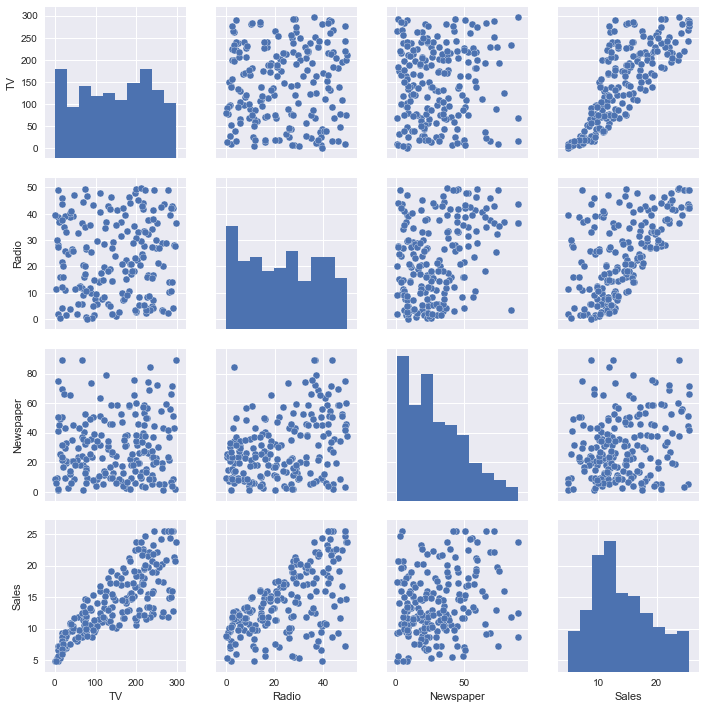

In [18]:
# Visualizing pairwise correleation

sns.pairplot( advt )

In [19]:
# Calculating correlations
advt.TV.corr( advt.Sales )

0.78236819845320438

In [20]:
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.059085,0.782368
Radio,0.054809,1.000000,0.356255,0.583363
Newspaper,0.059085,0.356255,1.000000,0.227594
Sales,0.782368,0.583363,0.227594,1.000000


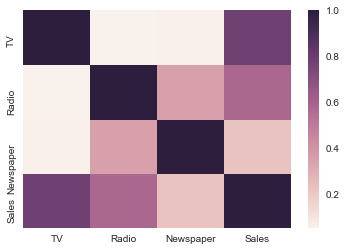

In [21]:
# Visualizing the correlations
#The darker is the color, the stronger is the correlation
sns.heatmap( advt.corr() )

### NOTES:
> The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then betweeb sales and radio i.e. 0.576. <br>
> correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. 

### Building Regression Model
> Linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression <br>
> A simple linear regression model is given by Y=mX+b <br>
> where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable. <br>
> Very briefly and simplistically, Linear Regression is a class of techniques for fitting a straight line to a set of data points

In [24]:
import statsmodels.formula.api as smf

In [24]:
advt.columns
#advt.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [26]:
lm=smf.ols('Sales ~ TV+Radio+Newspaper', advt).fit()

In [13]:
lm.summary()

# Things to check in the result interpretation

# 1- R2
# 2- ADjusted R2
# 3- there should not be much different begtween R2 and Adj R2 | Why ?
# 4- F STatistics - ANOVA
#   (generally used when to compare a second model with the first one)

# 5- to check teh P value of each variable
#   to detect its sginificance in my model
    
#     Ho - X1 is not having impact on Sales
    
#     in this case News Paper is accepted having P 0.86> 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 28 Oct 2017   Prob (F-statistic):           1.58e-96
Time:                        17:11:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lm = smf.ols( 'Sales ~ TV+Radio', advt ).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     939.5
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          1.82e-101
Time:                        12:25:37   Log-Likelihood:                -375.32
No. Observations:                 200   AIC:                             756.6
Df Residuals:                     197   BIC:                             766.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0372      0.279     10.890      0.000       2.487       3.587
TV             0.0451      0.001     34.241      0.000       0.042       0.048
Radio          0.1878      0.008     24.663      0.000       0.173       0.203
==============================================================================
Omnibus:                       29.901   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.439
Skew:                          -0.980   Prob(JB):                     4.50e-09
Kurtosis:                       3.876   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Getting the f value
lm.f_pvalue

In [30]:
# Getting model parameters
lm.params

Intercept    3.037164
TV           0.045086
Radio        0.187786
dtype: float64

In [31]:
# Parameters at 95% confidence intervals

lm.conf_int()

,0,1
Intercept,2.487161,3.587166
TV,0.042489,0.047683
Radio,0.172771,0.202802


In [32]:
# Verifying parameter significance
lm.pvalues

Intercept    6.369904e-22
TV           6.960144e-85
Radio        3.849279e-62
dtype: float64

### Notes:
> Parameters estimated are considered to be significant if p-value is less than 0.05 <br>
> This indicates intercept and TV both are significant parameters. And the parameter estimates can be accepted. <br>
> So, the linear model is Sales=7.032+0.047∗TV


### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> R-squared = Explained variation / Total variation <br>
> Total variation is variation of response variable around it's mean. <br>
> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
> while 100% signifies that the model explains all the variability of the response. <br>
> The closer the r-square to 100%, the better is the model. <br>

In [33]:
lm.rsquared

0.9051018203011454

In [34]:
round( float( lm.rsquared ), 2 )

0.91

In [36]:
### MAKING PREDICTIONS - Applying the model 
ltmpredic = lm.predict(advt)

In [39]:
ltmpredic[0:10]

0    20.509818
1    12.423503
2    12.432040
3    17.623297
4    13.216837
5    12.612167
6    11.789012
7    12.137135
8     3.819256
9    12.533627
dtype: float64

In [40]:
from sklearn import metrics

In [41]:
print(dir(metrics))

['SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'base', 'brier_score_loss', 'calinski_harabaz_score', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mutual_info_score', 'normalized_mutual_info_score', 'pairwise', 'pairwise_distances', 'pairwise_distance

### Calculating mean square error ... RMSE
> RMSE calculate the difference between the actual value and predicted value of the response variable <br>
> The square root of the mean/average of the square of all of the error. <br> 
> Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors. <br>
> The lesser the RMSE value, the better is the model.

In [42]:
mse = metrics.mean_squared_error( advt.Sales, ltmpredic )



In [44]:
rmse = np.sqrt( mse )

In [45]:
rmse

1.5803352244496103

In [ ]:
#Get the residuals and plot them
lm.resid[1:10]

> One of the assumptions is that the residuals should be normally distributed i.e. it should be random.
The residuals should be plotted against the response variable and it should not show any pattern

In [ ]:
sns.jointplot(  advt.Sales, lm.resid )

### Multiple Linear Regression Model

In [29]:
from sklearn import metrics

In [ ]:
lm = smf.ols( 'Sales ~ TV + Radio + Newspaper', advt ).fit()

In [ ]:
lm.summary()

In [ ]:
lm.params

In [ ]:
lm.pvalues

In [25]:
lm = smf.ols( 'Sales ~ TV + Radio', advt ).fit()

In [26]:
lm.params

Intercept    3.037164
TV           0.045086
Radio        0.187786
dtype: float64

In [ ]:
lm.pvalues

In [27]:
lmpredict = lm.predict( {'TV': advt.TV, 'Radio':advt.Radio } )

In [30]:
mse = metrics.mean_squared_error( advt.Sales, lmpredict )
rmse = np.sqrt( mse )
rmse

1.5803352244496103

In [31]:
metrics.mean_absolute_error(advt.Sales, lmpredict)

1.2144738980079266

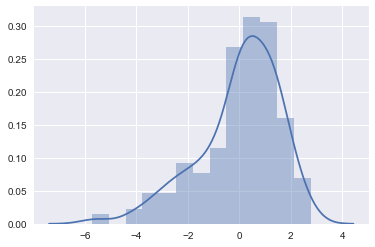

In [32]:
sns.distplot(lm.resid)

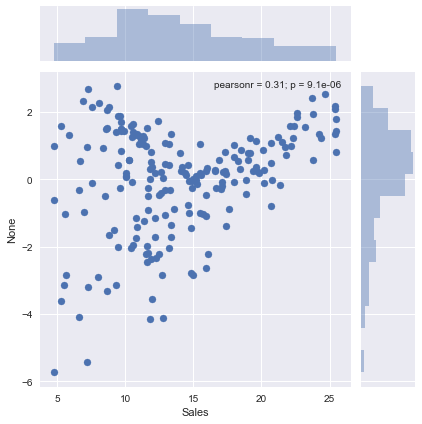

In [33]:
sns.jointplot(  advt.Sales, lm.resid )

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# Splitting into Train and test data sets
# Typically the model should be built on a training dataset and validated against a test dataset
# Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test.

from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  advt[["TV", "Radio", "Newspaper"]],
  advt.Sales,
  test_size=0.3,
  random_state = 42 )

In [8]:
print len( X_train )
print len( X_test)

140
60


In [9]:
## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [14]:
linreg.coef_

array([ 0.04405928,  0.1992875 ,  0.00688245])

In [17]:
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

1.9485372043446387

In [20]:
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

1.574596830590544

In [21]:
metrics.r2_score( y_train, y_pred_t )

0.90551595022277531

In [22]:
metrics.r2_score( y_test, y_pred )


0.86094665082303679

In [23]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.044059280957465197),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.0068824522222754557)]

In [24]:
residuals = y_test - y_pred

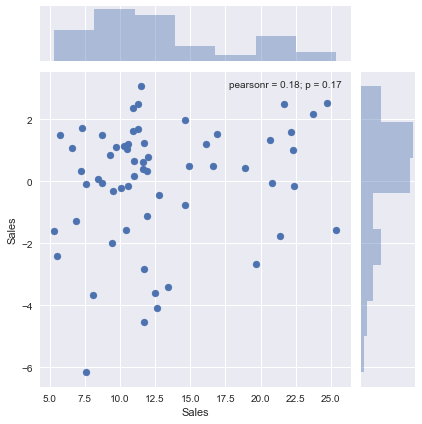

In [27]:
sns.jointplot(  advt.Sales, residuals )

In [ ]:
sns.distplot( residuals )

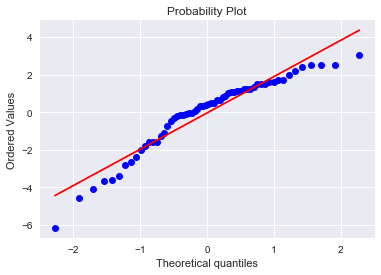

In [28]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [ ]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [ ]:
linreg = LinearRegression()

In [ ]:
cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )

In [ ]:
round( np.mean( cross_val_score( linreg,
                              X_train,
                              y_train,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

In [ ]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [ ]:
F_values, p_values  = f_regression(  X_train, y_train )

In [ ]:
F_values

In [ ]:
['%.3f' % p for p in p_values]

As p - values are less than 5% - the variables are siginificant in the regression equation.

In [ ]:
### Exporting and importing the model
import pickle

In [ ]:
from sklearn.externals import joblib
joblib.dump(linreg, 'lin_model.pkl', compress=9)

In [ ]:
model_clone = joblib.load('lin_model.pkl')